In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data, axis, frames_lost, y_label, legend_unit, y_lim=[]):
    axis.plot(data)
    
    for frame_lost in frames_lost:
        # axis.axvline(x=frame_lost, color="r")
        axis.axvline(x=frame_lost, ymin=0.4, ymax=0.6, color="r")
        
    axis.set_xlabel("Frame number")
    axis.set_ylabel(y_label)
    axis.set_title(y_label + " during connection")
    
    if y_lim != []:
        axis.axis(ymin=y_lim[0], ymax=y_lim[1])
    
    avrg = round(np.average(data), 2)
    axis.legend(["Avg: " + str(avrg) + legend_unit], loc=1)


def plot_graphs(all_fps, all_delays, all_img_bytes, frames_lost, fps):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
    
    plot_data(all_fps, axes[0], frames_lost, y_label="FPS", legend_unit=" FPS", y_lim=[0, 65])
    plot_data(all_delays, axes[1], frames_lost, y_label="Delay", legend_unit=" ms")
    plot_data(all_img_bytes, axes[2], frames_lost, y_label="Number of bytes", legend_unit=" bytes")
    
    fig.tight_layout()
    
def load_data(file_name, fps):
    with open(file_name, "rb") as file:
        cam_data = np.load(file)
        
    print("Data shape:", cam_data.shape)
    
    all_fps = cam_data[0, :]
    len_before_rem = all_fps.shape[0]  # Number of FPS stored before zeros removal.
    # Removing the zeros, which is present in the first second before obtaining the first average FPS over the first second.
    all_fps = all_fps[all_fps != 0]
    
    
    total_frames = all_fps.shape[0]
    print("Total frames:", total_frames)
    connection_time = round((total_frames / fps) / 60.0, 1)  # Maybe add this to the title of the plots.
    print("Connection time:", connection_time, "minutes")
    
    
    # Number of FPS stored after zero removal, this is used to match number of samples the other plots.
    len_after_rem = all_fps.shape[0]
    samples_removed = len_before_rem - len_after_rem

    
    all_delays = cam_data[1, samples_removed:] * 1000  # Converting to milliseconds.
    all_img_bytes = cam_data[2, samples_removed:]
    all_img_bytes = all_img_bytes[all_img_bytes != -1]  # Removing all -1 (when frame was not received successfully)
    frames_lost = cam_data[3, samples_removed:]
    
    # Removing the minus one fillers, see testing_cam_connection.py for why.
    only_frames_lost = frames_lost[frames_lost != -1]
    num_frames_lost = only_frames_lost.shape[0]
    print("Number of frames lost:", num_frames_lost)
    
    success_rate = round(((total_frames-num_frames_lost) / total_frames) * 100, 2)
    unsuccess_rate = round(100 - success_rate, 2)
    print("Percentage of successfully transferred frames:", success_rate, "%")
    print("Percentage of unsuccessfully transferred frames:", unsuccess_rate, "%")
    
    return all_fps, all_delays, all_img_bytes, frames_lost, success_rate
    
        

# For 320x240 at 30 FPS

Data shape: (4, 17999)
Total frames: 17969
Connection time: 10.0 minutes
Number of frames lost: 46
Percentage of successfully transferred frames: 99.74 %
Percentage of unsuccessfully transferred frames: 0.26 %


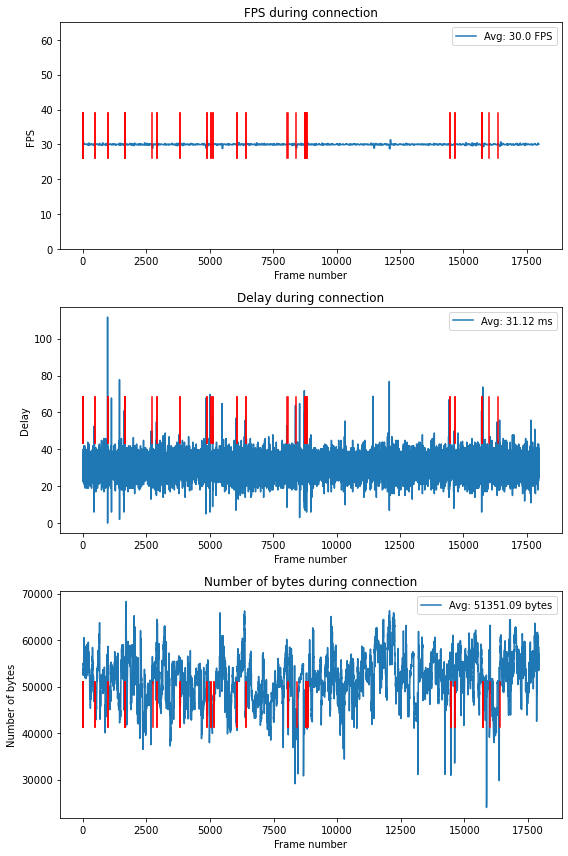

In [2]:
all_fps1, all_delays1, all_img_bytes1, frames_lost1, success_rate1 = load_data("cam_data_30fps_320x240.npy", fps=30)
plot_graphs(all_fps1, all_delays1, all_img_bytes1, frames_lost1, fps=30)

Data shape: (4, 18023)
Total frames: 17993
Connection time: 10.0 minutes
Number of frames lost: 75
Percentage of successfully transferred frames: 99.58 %
Percentage of unsuccessfully transferred frames: 0.42 %


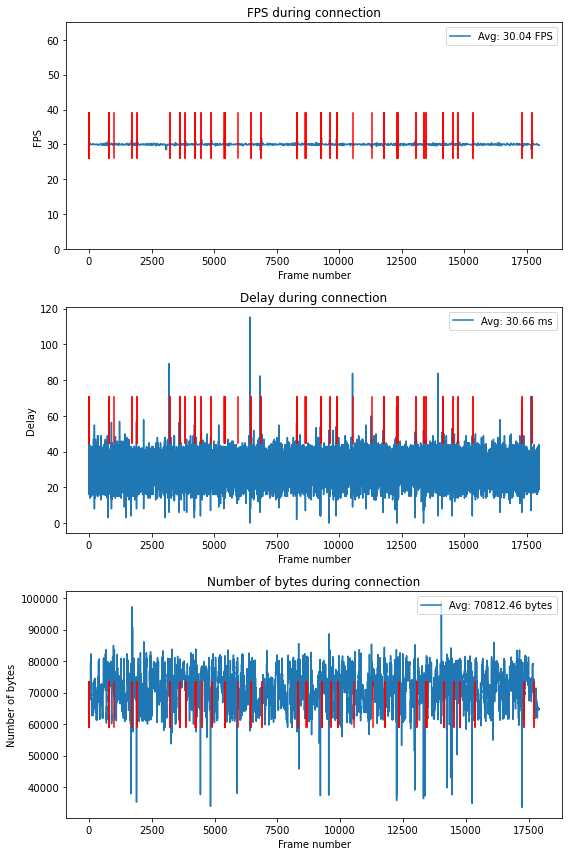

In [3]:
all_fps2, all_delays2, all_img_bytes2, frames_lost2, success_rate2 = load_data("cam_data_30fps_640x480.npy", fps=30)
plot_graphs(all_fps2, all_delays2, all_img_bytes2, frames_lost2, fps=30)

Data shape: (4, 18009)
Total frames: 17978
Connection time: 10.0 minutes
Number of frames lost: 60
Percentage of successfully transferred frames: 99.67 %
Percentage of unsuccessfully transferred frames: 0.33 %


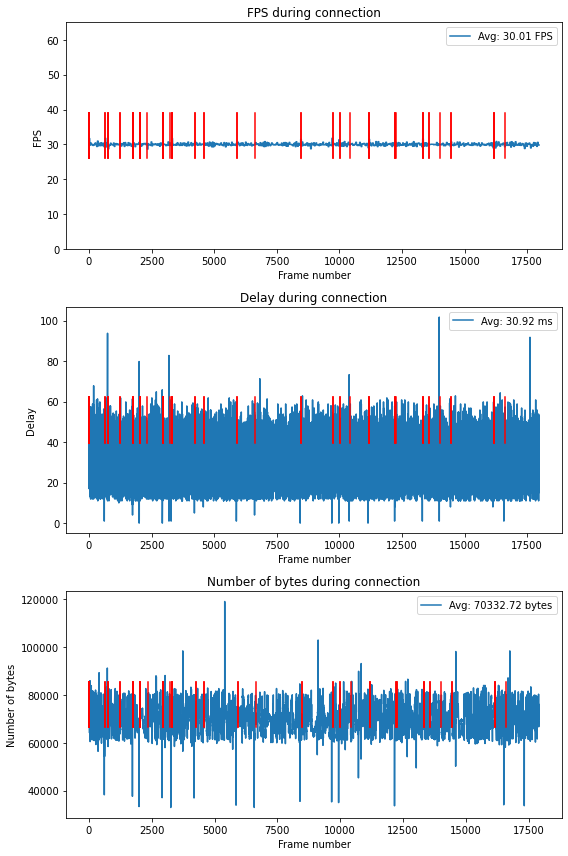

In [4]:
all_fps3, all_delays3, all_img_bytes3, frames_lost3, success_rate3 = load_data("cam_data_30fps_1640x922.npy", fps=30)
plot_graphs(all_fps3, all_delays3, all_img_bytes3, frames_lost3, fps=30)

In [5]:
plt.plot?

(-898.85, 18875.85, 25.0, 35.0)

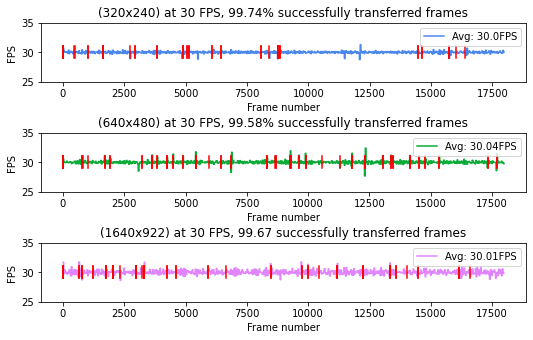

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 5))

fig.tight_layout(pad=3.0)

axis = axes[0]
axis.plot(all_fps1, c="#4a87ec")
axis.bottom= 5

for frame_lost in frames_lost1:
    # axis.axvline(x=frame_lost, color="r")
    axis.axvline(x=frame_lost, ymin=0.4, ymax=0.6, color="r")

avrg = round(np.average(all_fps1), 2)
legend_unit = "FPS"
axis.legend(["Avg: " + str(avrg) + legend_unit], loc=1)


axis.set_xlabel("Frame number")
axis.set_ylabel("FPS")
axis.set_title(f"(320x240) at 30 FPS, {success_rate1}% successfully transferred frames")

axis.axis(ymin=25, ymax=35)




axis = axes[1]
axis.plot(all_fps2, c="#0bab38")

for frame_lost in frames_lost2:
    # axis.axvline(x=frame_lost, color="r")
    axis.axvline(x=frame_lost, ymin=0.4, ymax=0.6, color="r")

avrg = round(np.average(all_fps2), 2)
legend_unit = "FPS"
axis.legend(["Avg: " + str(avrg) + legend_unit], loc=1)


axis.set_xlabel("Frame number")
axis.set_ylabel("FPS")
axis.set_title(f"(640x480) at 30 FPS, {success_rate2}% successfully transferred frames")
# axis.set_title("FPS (640x480) at 30FPS")
axis.axis(ymin=25, ymax=35)




axis = axes[2] 
axis.plot(all_fps3, c="#e185ff")

for frame_lost in frames_lost3:
    # axis.axvline(x=frame_lost, color="r")
    axis.axvline(x=frame_lost, ymin=0.4, ymax=0.6, color="r")

avrg = round(np.average(all_fps3), 2)
legend_unit = "FPS"
axis.legend(["Avg: " + str(avrg) + legend_unit], loc=1)


axis.set_xlabel("Frame number")
axis.set_ylabel("FPS")
axis.set_title(f"(1640x922) at 30 FPS, {success_rate3} successfully transferred frames")
# axis.set_title("FPS (1640x922) at 30FPS")
axis.axis(ymin=25, ymax=35)



# For 320x240 at 60 FPS

Data shape: (4, 36083)
Total frames: 36023
Connection time: 10.0 minutes
Number of frames lost: 92
Percentage of successfully transferred frames: 99.74 %
Percentage of unsuccessfully transferred frames: 0.26 %


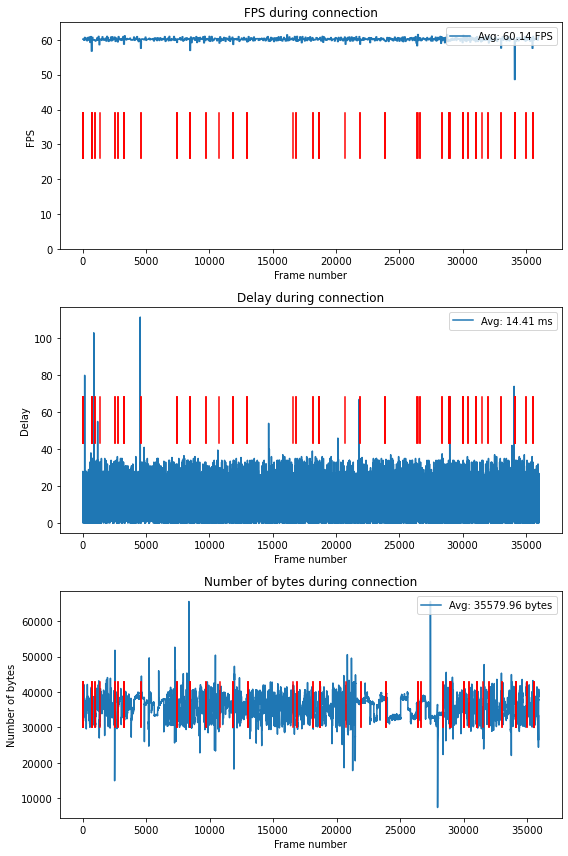

In [25]:
all_fps4, all_delays4, all_img_bytes4, frames_lost4, success_rate4 = load_data("cam_data_60fps_320x240.npy", fps=60)
plot_graphs(all_fps4, all_delays4, all_img_bytes4, frames_lost4, fps=60)

Data shape: (4, 36106)
Total frames: 36046
Connection time: 10.0 minutes
Number of frames lost: 50
Percentage of successfully transferred frames: 99.86 %
Percentage of unsuccessfully transferred frames: 0.14 %


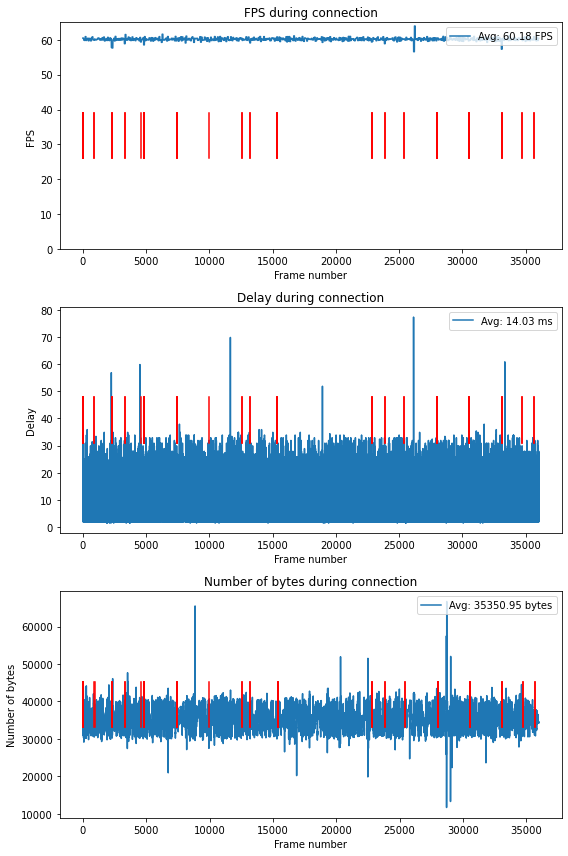

In [26]:
all_fps5, all_delays5, all_img_bytes5, frames_lost5, success_rate5 = load_data("cam_data_60fps_640x480.npy", fps=60)
plot_graphs(all_fps5, all_delays5, all_img_bytes5, frames_lost5, fps=60)

Data shape: (4, 18453)
Total frames: 18421
Connection time: 5.1 minutes
Number of frames lost: 40
Percentage of successfully transferred frames: 99.78 %
Percentage of unsuccessfully transferred frames: 0.22 %


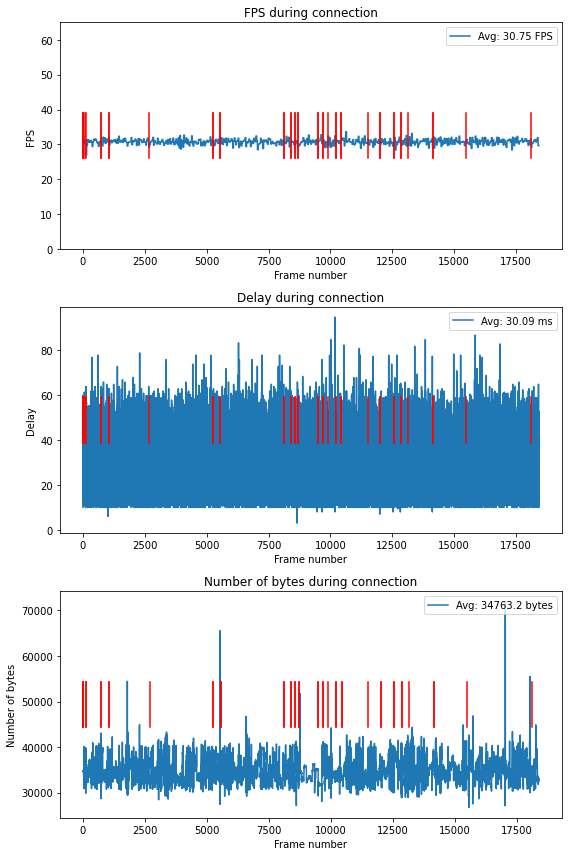

In [27]:
all_fps6, all_delays6, all_img_bytes6, frames_lost6, success_rate6 = load_data("cam_data_60fps_1640x922.npy", fps=60)
plot_graphs(all_fps6, all_delays6, all_img_bytes6, frames_lost6, fps=60)

(-921.0, 19341.0, 25.0, 35.0)

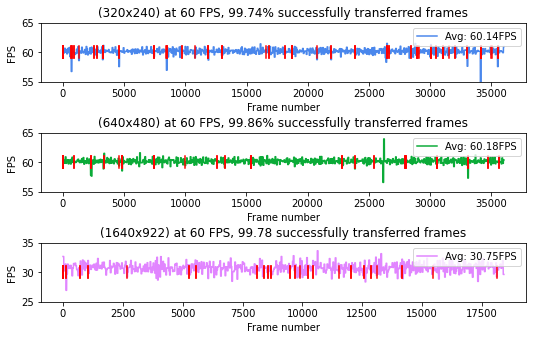

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 5))

fig.tight_layout(pad=3.0)

axis = axes[0]
axis.plot(all_fps4, c="#4a87ec")
axis.bottom= 5

for frame_lost in frames_lost4:
    # axis.axvline(x=frame_lost, color="r")
    axis.axvline(x=frame_lost, ymin=0.4, ymax=0.6, color="r")

avrg = round(np.average(all_fps4), 2)
legend_unit = "FPS"
axis.legend(["Avg: " + str(avrg) + legend_unit], loc=1)


axis.set_xlabel("Frame number")
axis.set_ylabel("FPS")
axis.set_title(f"(320x240) at 60 FPS, {success_rate4}% successfully transferred frames")

axis.axis(ymin=55, ymax=65)




axis = axes[1]
axis.plot(all_fps5, c="#0bab38")

for frame_lost in frames_lost5:
    # axis.axvline(x=frame_lost, color="r")
    axis.axvline(x=frame_lost, ymin=0.4, ymax=0.6, color="r")

avrg = round(np.average(all_fps5), 2)
legend_unit = "FPS"
axis.legend(["Avg: " + str(avrg) + legend_unit], loc=1)


axis.set_xlabel("Frame number")
axis.set_ylabel("FPS")
axis.set_title(f"(640x480) at 60 FPS, {success_rate5}% successfully transferred frames")
# axis.set_title("FPS (640x480) at 30FPS")
axis.axis(ymin=55, ymax=65)




axis = axes[2]
axis.plot(all_fps6, c="#e185ff")

for frame_lost in frames_lost6:
    # axis.axvline(x=frame_lost, color="r")
    axis.axvline(x=frame_lost, ymin=0.4, ymax=0.6, color="r")

avrg = round(np.average(all_fps6), 2)
legend_unit = "FPS"
axis.legend(["Avg: " + str(avrg) + legend_unit], loc=1)


axis.set_xlabel("Frame number")
axis.set_ylabel("FPS")
axis.set_title(f"(1640x922) at 60 FPS, {success_rate6} successfully transferred frames")
# axis.set_title("FPS (1640x922) at 30FPS")
axis.axis(ymin=25, ymax=35)



#  old

# For 640x480 at 30 FPS 

# For 640x480 at 60 FPS